In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

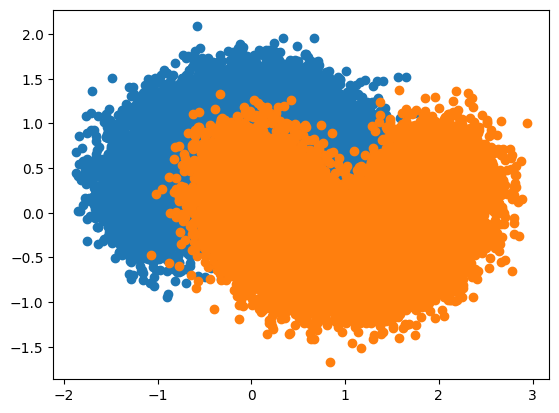

In [2]:
x, y = datasets.make_moons(n_samples=50000, noise=0.3, random_state=42)
plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])
plt.show()

In [3]:
x

array([[ 0.71820567, -0.21809028],
       [ 0.11096372,  1.10964541],
       [ 0.61562814, -0.06539887],
       ...,
       [ 1.58004352, -0.3637176 ],
       [ 0.90929791, -0.09962261],
       [-0.97512015,  0.87195198]], shape=(50000, 2))

In [4]:
y

array([1, 0, 0, ..., 1, 0, 0], shape=(50000,))

In [5]:
# 默认分割比例是 75% 和 25%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)
log_clf.score(x_test, y_test)

0.85344

In [7]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train, y_train)
svm_clf.score(x_test, y_test)

0.91216

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)

0.8752

In [9]:
# 训练好模型，测试集做预测
# 人工合一下
y_predict1 = log_clf.predict(x_test)
y_predict2 = svm_clf.predict(x_test)
y_predict3 = dt_clf.predict(x_test)
# 预测的结果不是 0 就是 1

In [10]:
# bagging
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')
y_predict[:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [11]:
y_test[:10]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [12]:
from sklearn.metrics import accuracy_score

# accuracy_score 计算准确率
accuracy_score(y_test, y_predict)

0.9044

上面的 hard voting，效果并不好。

![pic1](./1.png)

![pic2](./2.png)

使用 VotingClassifier 如下：

In [13]:
from sklearn.ensemble import VotingClassifier

#hard模式就是少数服从多数
voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier())], voting='hard')

In [14]:
voting_clf.fit(x_train, y_train)
voting_clf.score(x_test, y_test)

0.904

可以看到，手动计算的 hard voting 结果和调用接口的 hard voting 的准确率一样。

更合理的投票，应该有权值。

In [15]:
# hard 和 soft 区别请看课件解释
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(probability=True)),  # 支持向量机中需要加入 probability
    ('dt_clf', DecisionTreeClassifier())], voting='soft')
voting_clf2.fit(x_train, y_train)
voting_clf2.score(x_test, y_test)


0.9036

使用bagging

In [16]:
from sklearn.tree import DecisionTreeClassifier  #用决策树集成上千模型
from sklearn.ensemble import BaggingClassifier

#估计器数目是5000呢？bootstrap是有放回抽样
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=1000, bootstrap=True)
bagging_clf.fit(x_train, y_train)
bagging_clf.score(x_test, y_test)

0.91256

oob设计

In [17]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True,oob_score=True)
bagging_clf2.fit(x_train, y_train)
bagging_clf2.oob_score_          # 拿没有取到的数据集作为测试集

0.9119466666666667

njobs

In [18]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True)
bagging_clf.fit(x_train, y_train)
bagging_clf.score(x_test, y_test)

0.90968

In [ ]:
# 使用多核
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, max_samples=100,
                                bootstrap=True, n_jobs=-1)
bagging_clf.fit(x_train, y_train)
bagging_clf.score(x_test, y_test)

0.90936

bootstrap_features 对特征进行采样。

In [ ]:
# 因为就两个特征，所以 max_features 设置为 1, 得到的分值较低是因为特征较少，采用随机特征不合适
# 这个是只对特征进行采样
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                                         n_estimators=500, max_samples=500, oob_score=True,
                                         bootstrap=True, n_jobs=-1,
                                         max_features=1, bootstrap_features=True)
random_subspaces_clf.fit(x, y)
random_subspaces_clf.oob_score_

0.88626

In [ ]:
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                                       n_estimators=500, max_samples=10000, oob_score=True,
                                       bootstrap=True, n_jobs=-1,
                                       max_features=1, bootstrap_features=True)
random_patches_clf.fit(x, y)
random_patches_clf.oob_score_
#这个代码有另外一个名字就是随机森林

0.8679

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rc_clf = RandomForestClassifier(n_estimators=500, random_state=666,
                                oob_score=True, n_jobs=-1)
rc_clf.fit(x, y)
rc_clf.oob_score_

0.90268

In [24]:
rc_clf = RandomForestClassifier(max_samples=37500, n_jobs=-1)
rc_clf.fit(x_train, y_train)
rc_clf.score(x_test, y_test)

0.90424

In [ ]:
# 因为这个样本的特征很少，所以 max_leaf_nodes 设为 16（很小）也还算合理
rc_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 random_state=666,
                                 oob_score=True, n_jobs=-1)
rc_clf2.fit(x, y)
rc_clf2.oob_score_

0.90962

**Extra-Trees** (Bagging)

Base Estimator: Decision Tree

决策树在节点划分上，使用随机的特征和随机的阈值。这提供额外的随机性，抑制过拟合，但增大了 bias，同时也有更快的训练速度。

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, oob_score=True,
                              bootstrap=True, n_jobs=-1)
et_clf.fit(x, y)
et_clf.oob_score_

0.90674

Boosting

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500)
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)


0.87672

In [ ]:
# 它默认用的也是决策树
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)

0.8976